In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


<ipython-input-13-d69c3992d9fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_production.values, y=avg_production.index, palette='viridis')


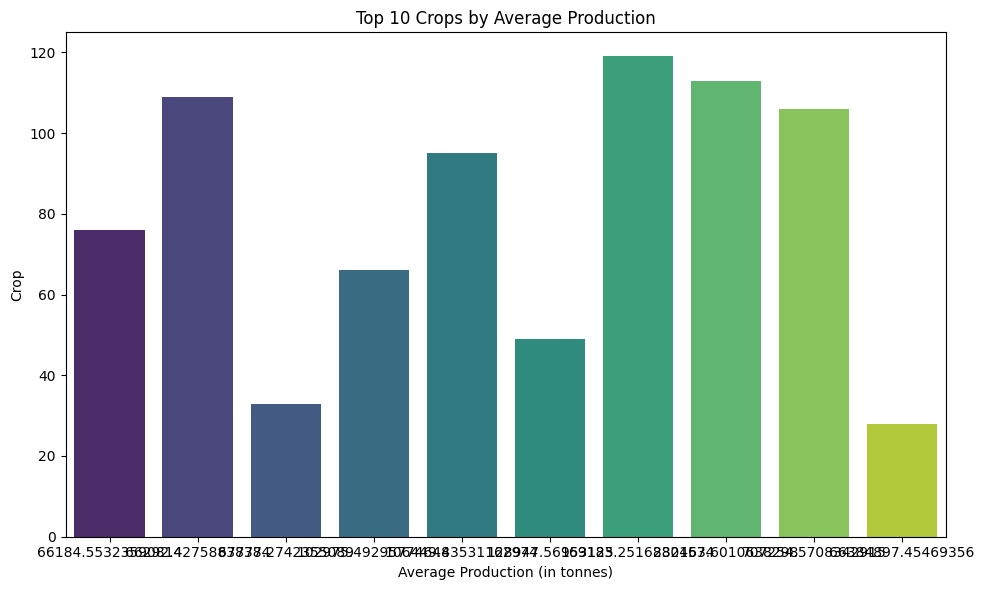

In [13]:
# Group by crop and calculate average production
avg_production = df.groupby('Crop')['Production'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_production.values, y=avg_production.index, palette='viridis')
plt.title("Top 10 Crops by Average Production")
plt.xlabel("Average Production (in tonnes)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()


<ipython-input-14-b01fa427495e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_area.index, y=season_area.values, palette='coolwarm')


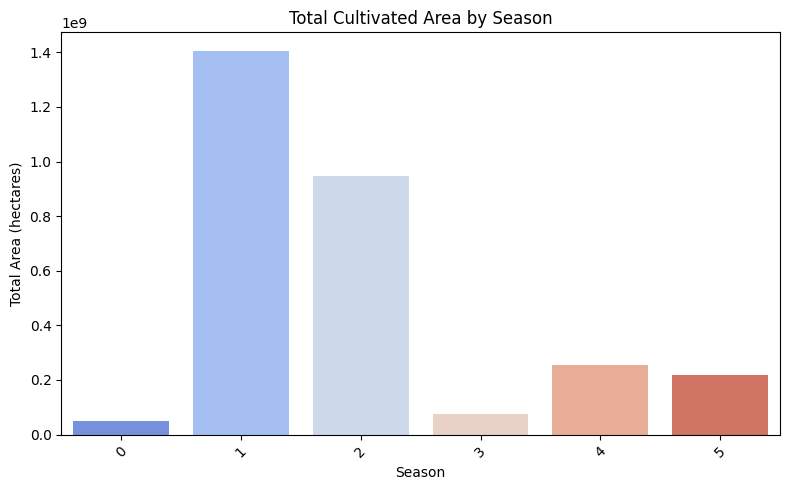

In [14]:
# Group by season and sum area
season_area = df.groupby('Season')['Area'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=season_area.index, y=season_area.values, palette='coolwarm')
plt.title("Total Cultivated Area by Season")
plt.xlabel("Season")
plt.ylabel("Total Area (hectares)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-17-d5ceaee46ca2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_production.values, y=state_production.index, palette='Spectral')


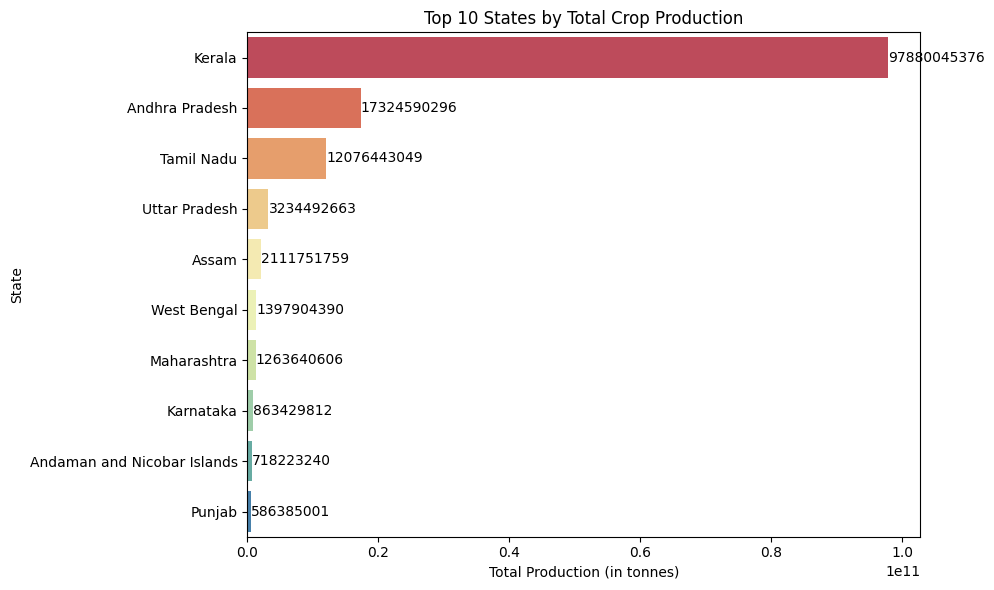

In [17]:
# Group by State and calculate total production
state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_production.values, y=state_production.index, palette='Spectral')

# Add data labels on bars
for i, v in enumerate(state_production.values):
    plt.text(v + 1e5, i, f'{v:.0f}', color='black', va='center')

plt.title("Top 10 States by Total Crop Production")
plt.xlabel("Total Production (in tonnes)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


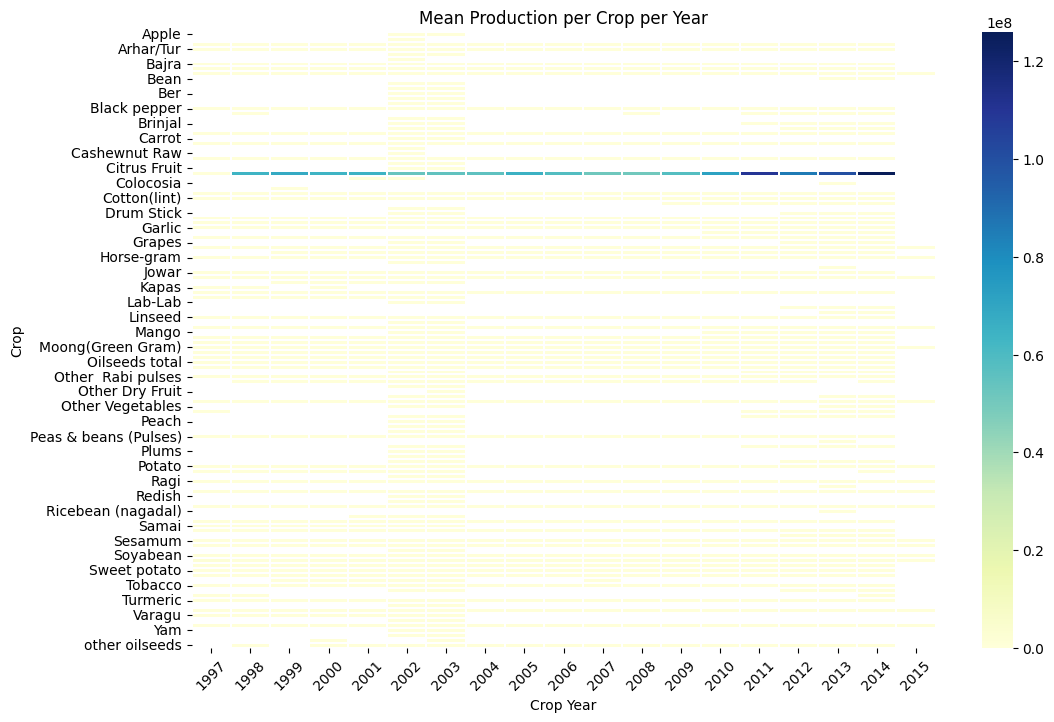

In [16]:
# Create pivot table: mean production per crop per year
pivot_table = df.pivot_table(values='Production', index='Crop', columns='Crop_Year', aggfunc='mean')
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.3)
plt.title("Mean Production per Crop per Year")
plt.xlabel("Crop Year")
plt.ylabel("Crop")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

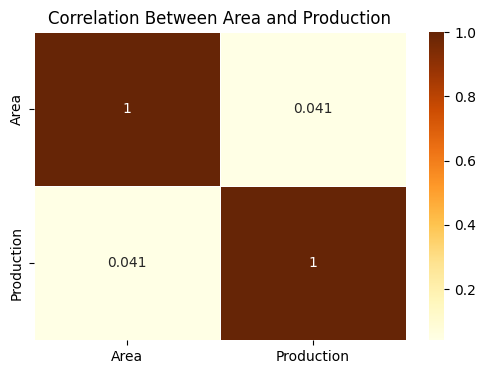

In [15]:
df = pd.read_csv("/content/crop_production.csv")
numeric_df = df[['Area', 'Production']]
numeric_df = numeric_df.dropna()
corr = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("Correlation Between Area and Production")
plt.show()

In [7]:
# Step 4: Data Preprocessing
# Drop rows with missing values (or use imputation if needed)
df = df.dropna()

# Drop unnecessary columns if any
df = df.drop(columns=['District_Name', 'State_Name'], errors='ignore')

# Convert categorical to numeric
le = LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

# Check updated DataFrame
df.head()


,Crop_Year,Season,Crop,Area,Production
0,2000,1,2,1254.0,2000.0
1,2000,1,74,2.0,1.0
2,2000,1,95,102.0,321.0
3,2000,4,7,176.0,641.0
4,2000,4,22,720.0,165.0


In [8]:
# Step 5: Feature Selection and Splitting
X = df[['Area', 'Season', 'Crop', 'Production']]  # You may modify this
y = df['Yield'] if 'Yield' in df.columns else df['Production']  # Adjust target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 6: Train ML Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9996817284640624
MSE: 128052671062.76416


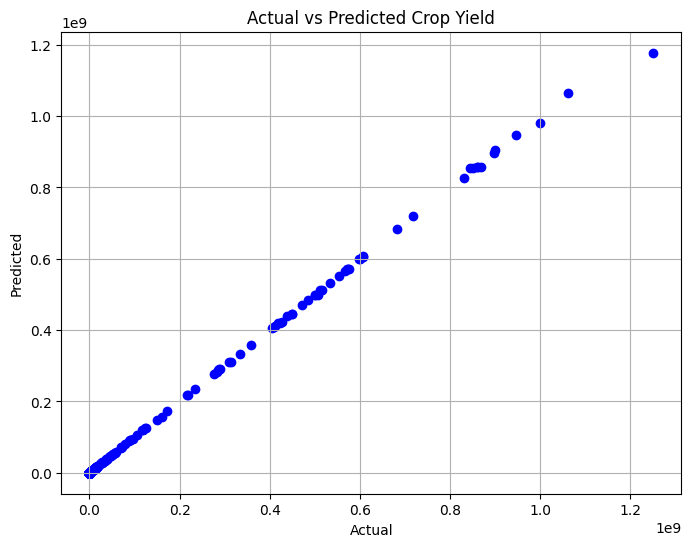

In [10]:
# Step 8: Plot Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()
